In [1]:
import pandas as pd
import numpy as np

In [2]:
test_features = pd.read_csv('test_features.csv')
test_target = pd.read_csv('test_target.csv')
tiktok_performance = pd.read_csv('tiktok_performance.csv')
train_features = pd.read_csv('train_features.csv')
train_target = pd.read_csv('train_target.csv')

In [4]:
print("Test Features:\n", test_features.head())
print("\nTest Target:\n", test_target.head())
print("\nTikTok Performance:\n", tiktok_performance.head())
print("\nTrain Features:\n", train_features.head())
print("\nTrain Target:\n", train_target.head())

Test Features:
    Comments  Shares  Views  Video_Length  User_Followers  User_Following  \
0       200     400  70000            45            2000             500   
1       180     210  50000            45            1500             350   

   User_Likes  
0        6000  
1        4000  

Test Target:
    Likes
0   2300
1   1800

TikTok Performance:
    Video_ID  User_ID Username      Video_Title  Category  Likes  Comments  \
0       101        1    user1  Dance Challenge     Dance   1500       120   
1       102        2    user2       Funny Skit    Comedy   2300       200   
2       103        3    user3         Tutorial  Tutorial   1200       150   
3       104        4    user4      Viral Dance     Dance   4500       500   
4       105        5    user5    Comedy Sketch    Comedy   1800       180   

   Shares  Views Upload_Date  Video_Length   Hashtags  User_Followers  \
0     300  50000  2024-08-01            30     #dance            1500   
1     400  70000  2024-08-02      

## Basic Operations

In [5]:
# Checking for missing values
print("Missing values in TikTok Performance dataset:\n", tiktok_performance.isnull().sum())

Missing values in TikTok Performance dataset:
 Video_ID          0
User_ID           0
Username          0
Video_Title       0
Category          0
Likes             0
Comments          0
Shares            0
Views             0
Upload_Date       0
Video_Length      0
Hashtags          0
User_Followers    0
User_Following    0
User_Likes        0
dtype: int64


In [10]:
mean_views = tiktok_performance['Views'].mean()
median_likes = np.median(tiktok_performance['Likes'])
std_comments = np.std(tiktok_performance['Comments'])

In [11]:
print(f"Mean Views: {mean_views}")
print(f"Median Likes: {median_likes}")
print(f"Standard Deviation of Comments: {std_comments}")

Mean Views: 60000.0
Median Likes: 1800.0
Standard Deviation of Comments: 137.69531582446805


In [12]:
# Aggregating the data for insights
views_likes_group = tiktok_performance.groupby('Category')[['Views', 'Likes']].mean()
print("Average Views and Likes per Category:\n", views_likes_group)

Average Views and Likes per Category:
             Views   Likes
Category                 
Comedy    60000.0  2050.0
Dance     70000.0  3000.0
Tutorial  40000.0  1200.0


## Advanced Operations

In [13]:
# Merging training and testing features
train_data = pd.concat([train_features, train_target], axis=1)
test_data = pd.concat([test_features, test_target], axis=1)

In [14]:
# Merging train_data and test_data
full_data = pd.concat([train_data, test_data], ignore_index=True)
print("Combined Train and Test Data:\n", full_data.head())

Combined Train and Test Data:
    Comments  Shares  Views  Video_Length  User_Followers  User_Following  \
0       150     250  40000            60            1200             200   
1       120     300  50000            30            1500             300   
2       500     600  90000            30            1800             400   
3       200     400  70000            45            2000             500   
4       180     210  50000            45            1500             350   

   User_Likes  Likes  
0        3000   1200  
1        5000   1500  
2        7000   4500  
3        6000   2300  
4        4000   1800  


In [15]:
# Merging Tiktok Performance dataset
merged_data = pd.merge(full_data, tiktok_performance, on=['Comments', 'Shares', 'Views', 'User_Followers', 'User_Following', 'User_Likes'], how='inner')
print("Merged Data with TikTok Performance:\n", merged_data.head())

Merged Data with TikTok Performance:
    Comments  Shares  Views  Video_Length_x  User_Followers  User_Following  \
0       150     250  40000              60            1200             200   
1       120     300  50000              30            1500             300   
2       500     600  90000              30            1800             400   
3       200     400  70000              45            2000             500   
4       180     210  50000              45            1500             350   

   User_Likes  Likes_x  Video_ID  User_ID Username      Video_Title  Category  \
0        3000     1200       103        3    user3         Tutorial  Tutorial   
1        5000     1500       101        1    user1  Dance Challenge     Dance   
2        7000     4500       104        4    user4      Viral Dance     Dance   
3        6000     2300       102        2    user2       Funny Skit    Comedy   
4        4000     1800       105        5    user5    Comedy Sketch    Comedy   

   Lik

In [18]:
# Calculating engagement metrics and data analysis
merged_data['engagement_rate'] = (merged_data['Likes_x'] + merged_data['Comments'] + merged_data['Shares']) / merged_data['Views']
merged_data['follower_engagement'] = merged_data['Likes_x'] / merged_data['User_Followers']

# Calculating average engagement rate per category
category_engagement = merged_data.groupby('Category')['engagement_rate'].mean()
print("Average Engagement Rate per Category:\n", category_engagement)

Average Engagement Rate per Category:
 Category
Comedy      0.042614
Dance       0.050311
Tutorial    0.040000
Name: engagement_rate, dtype: float64


## Visualisation

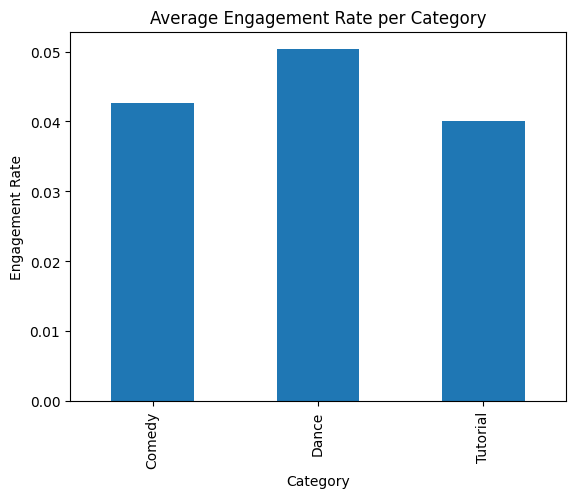

In [20]:
import matplotlib.pyplot as plt

# Now ploting for avg engagement rate per category
category_engagement.plot(kind='bar', title="Average Engagement Rate per Category")
plt.xlabel("Category")
plt.ylabel("Engagement Rate")
plt.show()